<a href="https://colab.research.google.com/github/sneyastha/hahahahah/blob/main/project_DATAwPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests pandas numpy matplotlib


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class WeatherAPI:
    def __init__(self, api_key, city):
        self.api_key = api_key
        self.city = city
        self.url = f"http://api.openweathermap.org/data/2.5/forecast?q={self.city}&appid={self.api_key}&units=metric"
        self.data = None

    def fetch_data(self):
        # Make the API request
        response = requests.get(self.url)
        # Convert response to JSON format
        self.data = response.json()

    def display_data(self):
        if self.data:
            return self.data
        else:
            return "Data not fetched yet. Call fetch_data() first."


# Instantiate the WeatherAPI class with the API key and city name
weather_api = WeatherAPI(api_key="cbcac5b0fc20ae92c7bdf16abf259f3e", city="Kathmandu")

# Fetch the data
weather_api.fetch_data()

# Display the fetched data
print(weather_api.display_data())


{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1736672400, 'main': {'temp': 18.12, 'feels_like': 17.16, 'temp_min': 18.12, 'temp_max': 18.58, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 852, 'humidity': 45, 'temp_kf': -0.46}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 75}, 'wind': {'speed': 1.71, 'deg': 261, 'gust': 1.81}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-01-12 09:00:00'}, {'dt': 1736683200, 'main': {'temp': 16.47, 'feels_like': 15.45, 'temp_min': 13.16, 'temp_max': 16.47, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 853, 'humidity': 49, 'temp_kf': 3.31}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 64}, 'wind': {'speed': 2.25, 'deg': 216, 'gust': 2.34}, 'visibility': 10000, 'pop': 0.02, 'sys': {'pod': 'n'}, 'dt_txt': '2025-01-12 12:00:00'}, {'dt': 1736694000, 'main': {'temp': 12.49, 'feels_like': 11.4

In [4]:
class WeatherForecast:
    def __init__(self, api_key, city):
        self.api_key = api_key
        self.city = city
        self.url = f"http://api.openweathermap.org/data/2.5/forecast?q={self.city}&appid={self.api_key}&units=metric"
        self.data = None
        self.weather_data = []

    def fetch_weather_data(self):
        # Make the API request
        response = requests.get(self.url)

        # Convert response to JSON format
        self.data = response.json()

    def extract_weather_info(self):
        # Extract the relevant weather data
        for forecast in self.data['list']:
            date_time = forecast['dt_txt']
            temperature = forecast['main']['temp']
            humidity = forecast['main']['humidity']  # Extract humidity
            wind_speed = forecast['wind']['speed']  # Extract wind speed
            pressure = forecast['main']['pressure']  # Extract pressure
            weather_description = forecast['weather'][0]['description']

            # Append all the extracted information to the weather_data list
            self.weather_data.append({
                'date_time': date_time,
                'temperature': temperature,
                'humidity': humidity,
                'wind_speed': wind_speed,
                'pressure': pressure,
                'weather_description': weather_description
            })

    def get_weather_dataframe(self):
        # Convert to DataFrame
        df = pd.DataFrame(self.weather_data)
        return df

# Example usage
api_key = "cbcac5b0fc20ae92c7bdf16abf259f3e"  # Use your actual API key
city = "Kathmandu"

weather = WeatherForecast(api_key, city)
weather.fetch_weather_data()
weather.extract_weather_info()

df = weather.get_weather_dataframe()

# Display the updated DataFrame
print(df)


              date_time  temperature  humidity  wind_speed  pressure  \
0   2025-01-12 09:00:00        18.12        45        1.71      1015   
1   2025-01-12 12:00:00        16.47        49        2.25      1016   
2   2025-01-12 15:00:00        12.49        63        1.06      1018   
3   2025-01-12 18:00:00         8.59        80        1.54      1019   
4   2025-01-12 21:00:00         7.42        83        0.58      1018   
5   2025-01-13 00:00:00         7.15        79        0.59      1017   
6   2025-01-13 03:00:00        11.80        61        0.69      1018   
7   2025-01-13 06:00:00        17.06        37        1.17      1016   
8   2025-01-13 09:00:00        17.74        32        1.70      1012   
9   2025-01-13 12:00:00        12.43        51        1.87      1014   
10  2025-01-13 15:00:00         9.02        65        0.61      1018   
11  2025-01-13 18:00:00         8.01        67        0.97      1017   
12  2025-01-13 21:00:00         7.41        67        1.02      

In [5]:
import sqlite3

class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        # Initialize database connection and cursor
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def create_table(self):
        # Create a table to store weather data if it doesn't exist
        self.cursor.execute('''
        CREATE TABLE IF NOT EXISTS weather (
            date_time TEXT,
            temperature REAL,
            humidity REAL,
            wind_speed REAL,
            pressure REAL,
            weather_description TEXT
        )
        ''')
        # Commit the changes to the database
        self.conn.commit()

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()
weather_db.create_table()
weather_db.close_connection()


In [7]:
class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def insert_weather_data(self, df):
        # Ensure 'date_time' is a datetime object
        df['date_time'] = pd.to_datetime(df['date_time'])

        # Insert weather data into the table
        for _, row in df.iterrows():
            date_time_str = row['date_time'].strftime('%Y-%m-%d %H:%M:%S')  # Convert date_time to string format
            self.cursor.execute('''
            INSERT INTO weather (date_time, temperature, humidity, wind_speed, pressure, weather_description)
            VALUES (?, ?, ?, ?, ?, ?)
            ''', (date_time_str, row['temperature'], row['humidity'], row['wind_speed'], row['pressure'], row['weather_description']))

        # Commit changes to the database
        self.conn.commit()

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()
weather_db.insert_weather_data(df)  # assuming df is your DataFrame with weather data
weather_db.close_connection()


In [8]:
class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def query_all_weather_data(self):
        # Query all data from the 'weather' table
        self.cursor.execute('SELECT * FROM weather')

        # Fetch all results
        rows = self.cursor.fetchall()

        # Display the results
        for row in rows:
            print(row)

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()
weather_db.query_all_weather_data()  # Fetch and display all weather data
weather_db.close_connection()


('2025-01-12 09:00:00', 18.12, 45.0, 1.71, 1015.0, 'broken clouds')
('2025-01-12 12:00:00', 16.47, 49.0, 2.25, 1016.0, 'broken clouds')
('2025-01-12 15:00:00', 12.49, 63.0, 1.06, 1018.0, 'light rain')
('2025-01-12 18:00:00', 8.59, 80.0, 1.54, 1019.0, 'light rain')
('2025-01-12 21:00:00', 7.42, 83.0, 0.58, 1018.0, 'light rain')
('2025-01-13 00:00:00', 7.15, 79.0, 0.59, 1017.0, 'light rain')
('2025-01-13 03:00:00', 11.8, 61.0, 0.69, 1018.0, 'clear sky')
('2025-01-13 06:00:00', 17.06, 37.0, 1.17, 1016.0, 'clear sky')
('2025-01-13 09:00:00', 17.74, 32.0, 1.7, 1012.0, 'few clouds')
('2025-01-13 12:00:00', 12.43, 51.0, 1.87, 1014.0, 'scattered clouds')
('2025-01-13 15:00:00', 9.02, 65.0, 0.61, 1018.0, 'scattered clouds')
('2025-01-13 18:00:00', 8.01, 67.0, 0.97, 1017.0, 'few clouds')
('2025-01-13 21:00:00', 7.41, 67.0, 1.02, 1017.0, 'clear sky')
('2025-01-14 00:00:00', 7.1, 67.0, 1.29, 1018.0, 'clear sky')
('2025-01-14 03:00:00', 12.33, 49.0, 1.78, 1020.0, 'clear sky')
('2025-01-14 06:00:00'

In [9]:
class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def calculate_daily_averages(self):
        # Query to calculate the daily average for each weather variable
        self.cursor.execute('''
            SELECT
                date_time,
                AVG(temperature) as avg_temperature,
                AVG(humidity) as avg_humidity,
                AVG(wind_speed) as avg_wind_speed,
                AVG(pressure) as avg_pressure
            FROM weather
            GROUP BY date(date_time)
        ''')

        # Fetch all results
        daily_averages = self.cursor.fetchall()

        # Display the daily averages
        for row in daily_averages:
            print(row)

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()
weather_db.calculate_daily_averages()  # Calculate and display daily averages
weather_db.close_connection()


('2025-01-12 09:00:00', 12.618, 64.0, 1.428, 1017.2)
('2025-01-13 00:00:00', 11.3275, 57.375, 1.0775, 1016.125)
('2025-01-14 00:00:00', 11.63375, 57.375, 1.1187500000000001, 1018.5)
('2025-01-15 00:00:00', 12.401249999999997, 54.375, 1.2049999999999998, 1018.375)
('2025-01-16 00:00:00', 13.298750000000002, 49.0, 1.1912500000000001, 1018.375)
('2025-01-17 00:00:00', 14.996666666666668, 41.666666666666664, 0.7999999999999999, 1018.0)


In [10]:
class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def create_daily_averages_table(self):
        # Create table for daily averages
        self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS daily_averages (
                date_time DATE PRIMARY KEY,
                avg_temperature REAL,
                avg_humidity REAL,
                avg_wind_speed REAL,
                avg_pressure REAL
            )
        ''')

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()
weather_db.create_daily_averages_table()  # Create the table for daily averages
weather_db.close_connection()


In [12]:
class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def fetch_daily_averages(self):
        # Query to calculate the daily average for each weather variable
        self.cursor.execute('''
            SELECT
                date_time,
                AVG(temperature) as avg_temperature,
                AVG(humidity) as avg_humidity,
                AVG(wind_speed) as avg_wind_speed,
                AVG(pressure) as avg_pressure
            FROM weather
            GROUP BY date(date_time)
        ''')

        # Fetch all results
        daily_averages = self.cursor.fetchall()
        return daily_averages

    def insert_daily_averages(self, daily_averages):
        # Insert daily averages into the table
        for row in daily_averages:
            self.cursor.execute('''
                INSERT INTO daily_averages (date_time, avg_temperature, avg_humidity, avg_wind_speed, avg_pressure)
                VALUES (?, ?, ?, ?, ?)
            ''', row)

        # Commit changes
        self.conn.commit()

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()

# Fetch daily averages
daily_averages = weather_db.fetch_daily_averages()

# Insert the fetched daily averages into the table
weather_db.insert_daily_averages(daily_averages)

# Close the connection after the operation
weather_db.close_connection()


In [14]:
class WeatherDatabase:
    def __init__(self, db_name='weather_data.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()

    def fetch_daily_averages(self):
        # Query to calculate the daily average for each weather variable
        self.cursor.execute('''
            SELECT
                date_time,
                AVG(temperature) as avg_temperature,
                AVG(humidity) as avg_humidity,
                AVG(wind_speed) as avg_wind_speed,
                AVG(pressure) as avg_pressure
            FROM weather
            GROUP BY date(date_time)
        ''')

        # Fetch all results
        daily_averages = self.cursor.fetchall()
        return daily_averages

    def insert_daily_averages(self, daily_averages):
        # Insert daily averages into the table
        for row in daily_averages:
            # Check if the date_time already exists in the table
            self.cursor.execute('''
                SELECT COUNT(*) FROM daily_averages WHERE date_time = ?
            ''', (row[0],))
            exists = self.cursor.fetchone()[0]

            if exists == 0:
                # Insert the row if it doesn't exist
                self.cursor.execute('''
                    INSERT INTO daily_averages (date_time, avg_temperature, avg_humidity, avg_wind_speed, avg_pressure)
                    VALUES (?, ?, ?, ?, ?)
                ''', row)
            else:
                print(f"Data for {row[0]} already exists. Skipping insert.")

        # Commit changes
        self.conn.commit()

    def verify_data_insertion(self):
        # Verify that the data is inserted correctly
        self.cursor.execute('SELECT * FROM daily_averages')
        daily_data = self.cursor.fetchall()

        for row in daily_data:
            print(row)

    def close_connection(self):
        # Close the database connection
        self.conn.close()

# Example usage
weather_db = WeatherDatabase()

# Fetch daily averages
daily_averages = weather_db.fetch_daily_averages()

# Insert the fetched daily averages into the table
weather_db.insert_daily_averages(daily_averages)

# Verify the data insertion
weather_db.verify_data_insertion()

# Close the connection after the operation
weather_db.close_connection()


Data for 2025-01-12 09:00:00 already exists. Skipping insert.
Data for 2025-01-13 00:00:00 already exists. Skipping insert.
Data for 2025-01-14 00:00:00 already exists. Skipping insert.
Data for 2025-01-15 00:00:00 already exists. Skipping insert.
Data for 2025-01-16 00:00:00 already exists. Skipping insert.
Data for 2025-01-17 00:00:00 already exists. Skipping insert.
('2025-01-12 09:00:00', 12.618, 64.0, 1.428, 1017.2)
('2025-01-13 00:00:00', 11.3275, 57.375, 1.0775, 1016.125)
('2025-01-14 00:00:00', 11.63375, 57.375, 1.1187500000000001, 1018.5)
('2025-01-15 00:00:00', 12.401249999999997, 54.375, 1.2049999999999998, 1018.375)
('2025-01-16 00:00:00', 13.298750000000002, 49.0, 1.1912500000000001, 1018.375)
('2025-01-17 00:00:00', 14.996666666666668, 41.666666666666664, 0.7999999999999999, 1018.0)


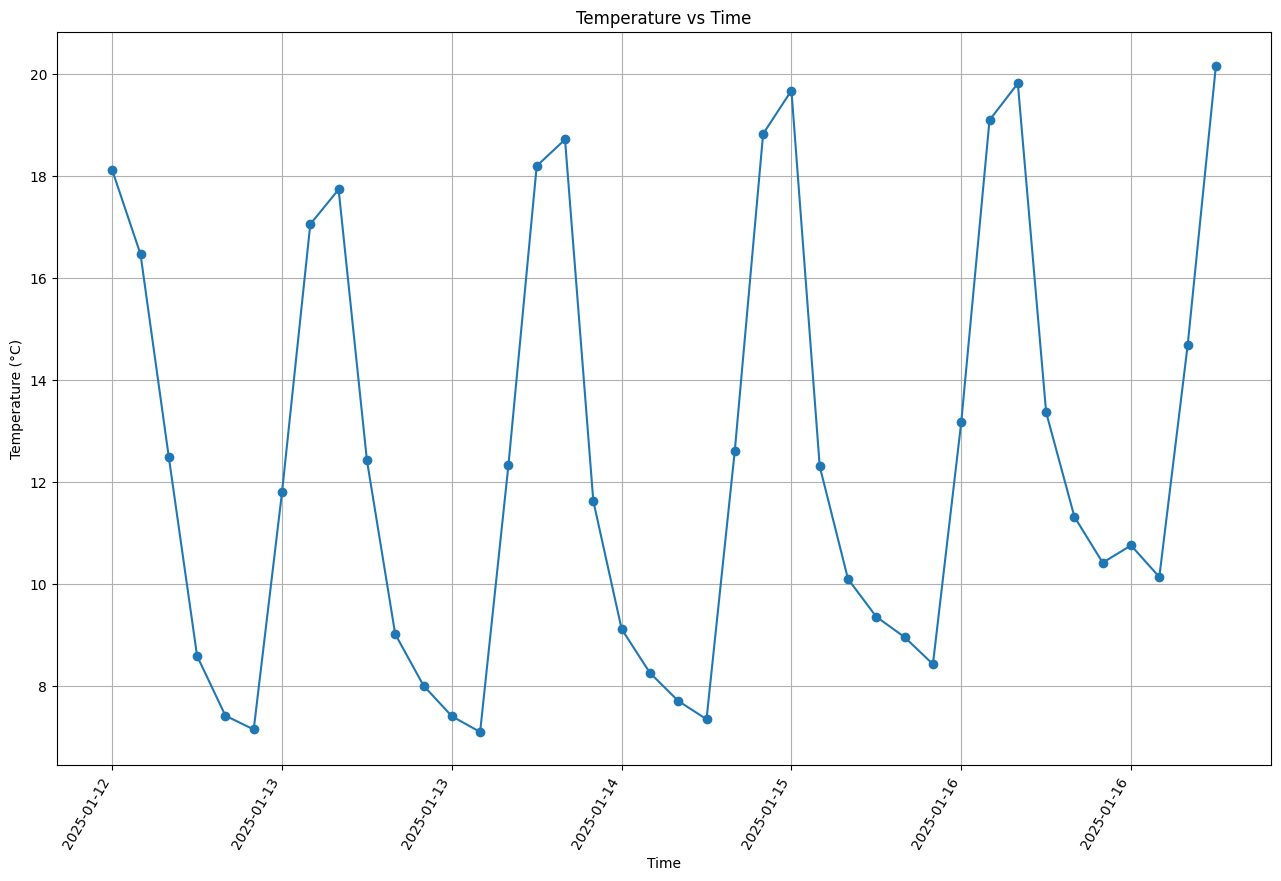

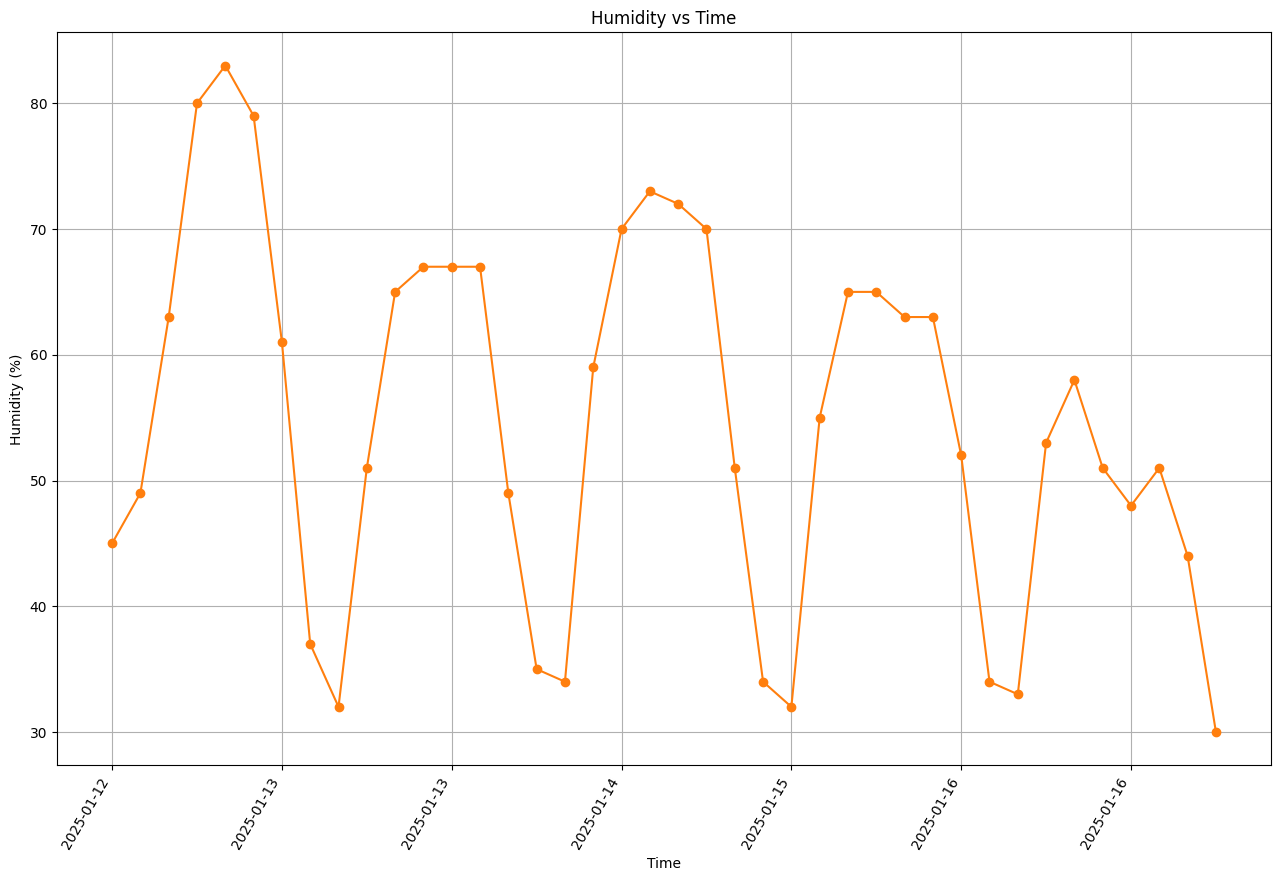

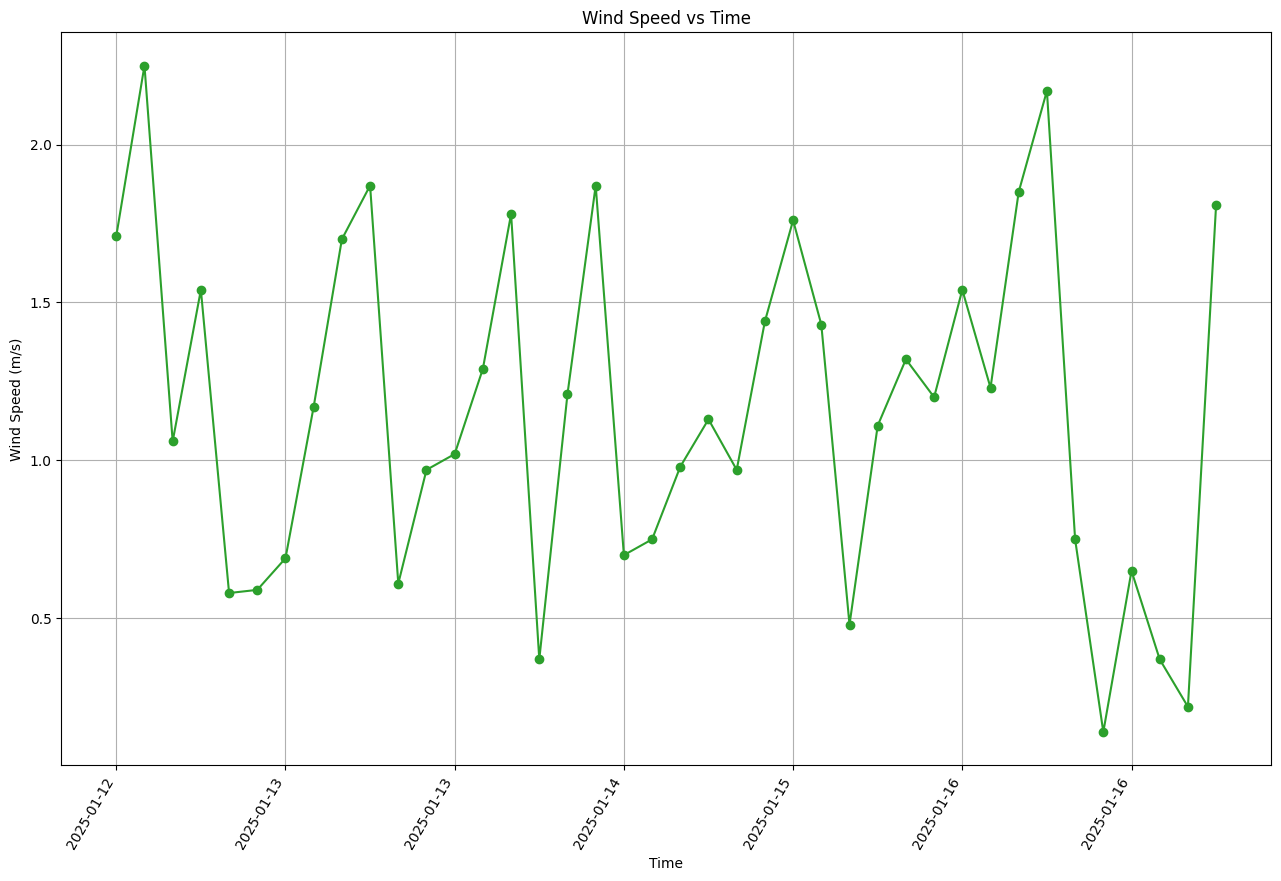

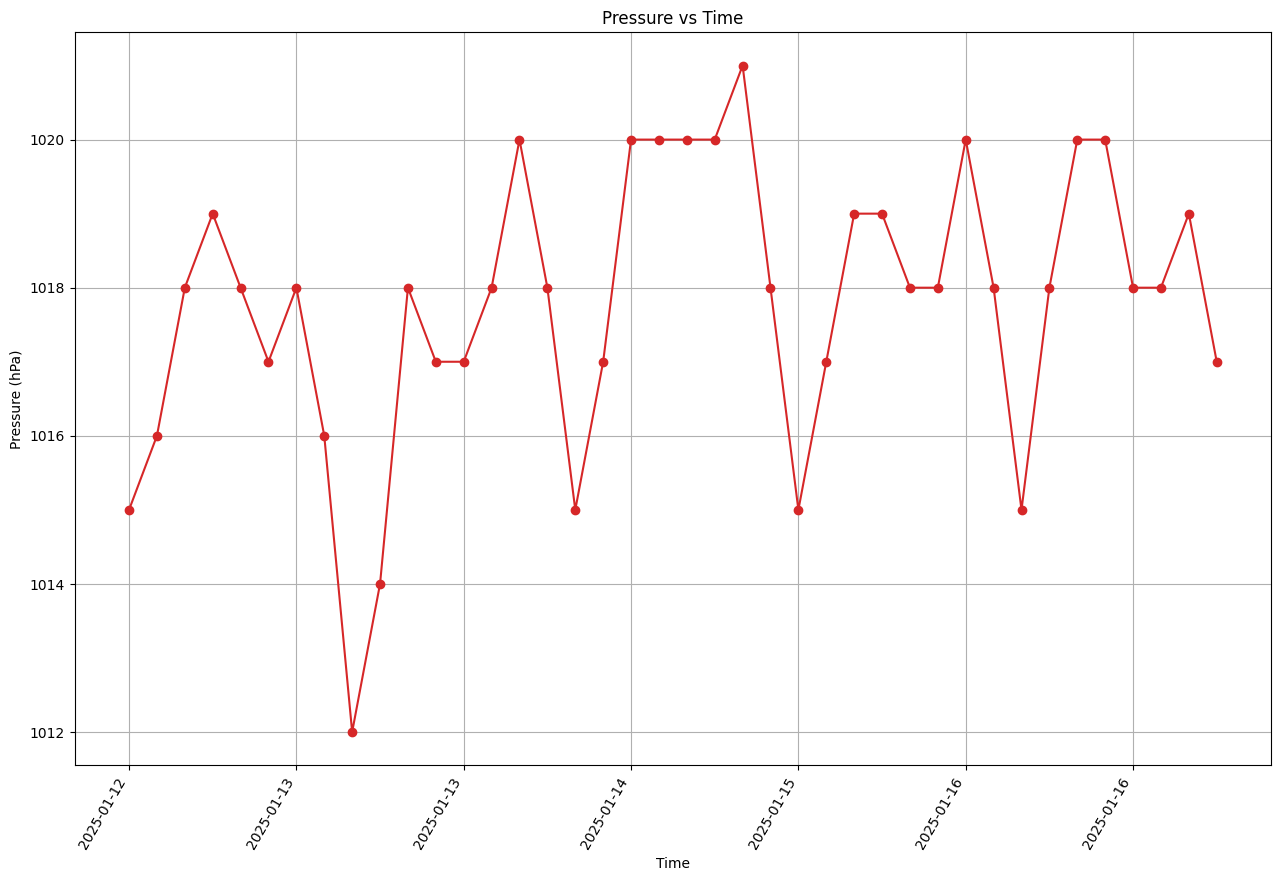

In [17]:
import matplotlib.pyplot as plt

class WeatherPlotter:
    def __init__(self, df):
        self.df = df  # DataFrame containing the weather data

    def plot_temperature(self):
        # Subplot 1: Temperature vs Time
        plt.figure(figsize=(14, 10))  # Increased figure size
        plt.plot(self.df['date_time'], self.df['temperature'], marker='o', color='tab:blue', label='Temperature (°C)')
        plt.xticks(rotation=60, ha="right", ticks=self.df['date_time'][::6])  # Display every 6th time
        plt.title('Temperature vs Time')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.grid(True)
        plt.tight_layout(pad=5.0)  # Increase padding between subplots
        plt.show()

    def plot_humidity(self):
        # Subplot 2: Humidity vs Time
        plt.figure(figsize=(14, 10))  # Increased figure size
        plt.plot(self.df['date_time'], self.df['humidity'], marker='o', color='tab:orange', label='Humidity (%)')
        plt.xticks(rotation=60, ha="right", ticks=self.df['date_time'][::6])  # Display every 6th time
        plt.title('Humidity vs Time')
        plt.xlabel('Time')
        plt.ylabel('Humidity (%)')
        plt.grid(True)
        plt.tight_layout(pad=5.0)  # Increase padding between subplots
        plt.show()

    def plot_wind_speed(self):
        # Subplot 3: Wind Speed vs Time
        plt.figure(figsize=(14, 10))  # Increased figure size
        plt.plot(self.df['date_time'], self.df['wind_speed'], marker='o', color='tab:green', label='Wind Speed (m/s)')
        plt.xticks(rotation=60, ha="right", ticks=self.df['date_time'][::6])  # Display every 6th time
        plt.title('Wind Speed vs Time')
        plt.xlabel('Time')
        plt.ylabel('Wind Speed (m/s)')
        plt.grid(True)
        plt.tight_layout(pad=5.0)  # Increase padding between subplots
        plt.show()

    def plot_pressure(self):
        # Subplot 4: Pressure vs Time
        plt.figure(figsize=(14, 10))  # Increased figure size
        plt.plot(self.df['date_time'], self.df['pressure'], marker='o', color='tab:red', label='Pressure (hPa)')
        plt.xticks(rotation=60, ha="right", ticks=self.df['date_time'][::6])  # Display every 6th time
        plt.title('Pressure vs Time')
        plt.xlabel('Time')
        plt.ylabel('Pressure (hPa)')
        plt.grid(True)
        plt.tight_layout(pad=5.0)  # Increase padding between subplots
        plt.show()

# Example usage:
# Assuming df is your DataFrame with weather data
weather_plotter = WeatherPlotter(df)

# Plot each weather variable individually
weather_plotter.plot_temperature()
weather_plotter.plot_humidity()
weather_plotter.plot_wind_speed()
weather_plotter.plot_pressure()


In [18]:
import pandas as pd

class WeatherStatistics:
    def __init__(self, df):
        # Initialize with the DataFrame containing weather data
        self.df = df

    def get_descriptive_stats(self):
        # Calculate descriptive statistics for relevant columns
        return self.df[['temperature', 'humidity', 'wind_speed', 'pressure']].describe()

    def display_descriptive_stats(self):
        # Get descriptive statistics and display them
        descriptive_stats = self.get_descriptive_stats()
        print(descriptive_stats)

# Example usage:
# Assuming df is your DataFrame with weather data
weather_stats = WeatherStatistics(df)

# Display the descriptive statistics
weather_stats.display_descriptive_stats()


       temperature   humidity  wind_speed     pressure
count    40.000000  40.000000   40.000000    40.000000
mean     12.434250  54.750000    1.157000  1017.775000
std       4.286055  14.904396    0.547948     1.928032
min       7.100000  30.000000    0.140000  1012.000000
25%       8.867500  44.750000    0.697500  1017.000000
50%      11.715000  54.000000    1.150000  1018.000000
75%      16.617500  65.500000    1.580000  1019.000000
max      20.170000  83.000000    2.250000  1021.000000


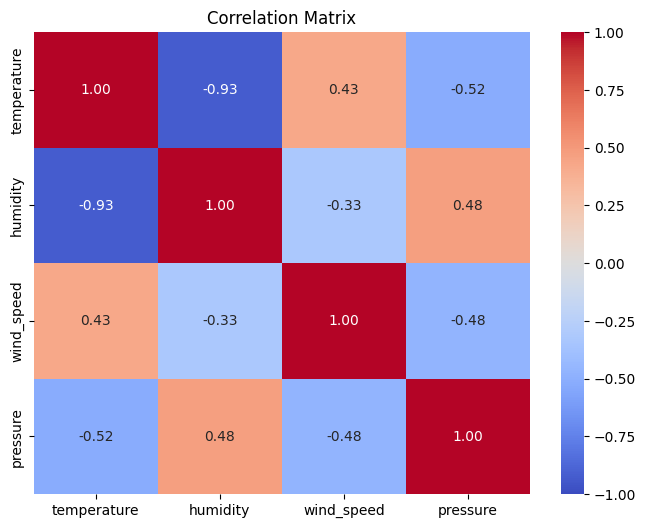

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class WeatherCorrelation:
    def __init__(self, df):
        # Initialize with the DataFrame containing weather data
        self.df = df

    def calculate_correlation(self):
        # Calculate correlation matrix for relevant columns
        return self.df[['temperature', 'humidity', 'wind_speed', 'pressure']].corr()

    def display_correlation_matrix(self):
        # Calculate correlation matrix and display it as a heatmap
        correlation_matrix = self.calculate_correlation()

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

# Example usage:
# Assuming df is your DataFrame with weather data
weather_correlation = WeatherCorrelation(df)

# Display the correlation matrix heatmap
weather_correlation.display_correlation_matrix()


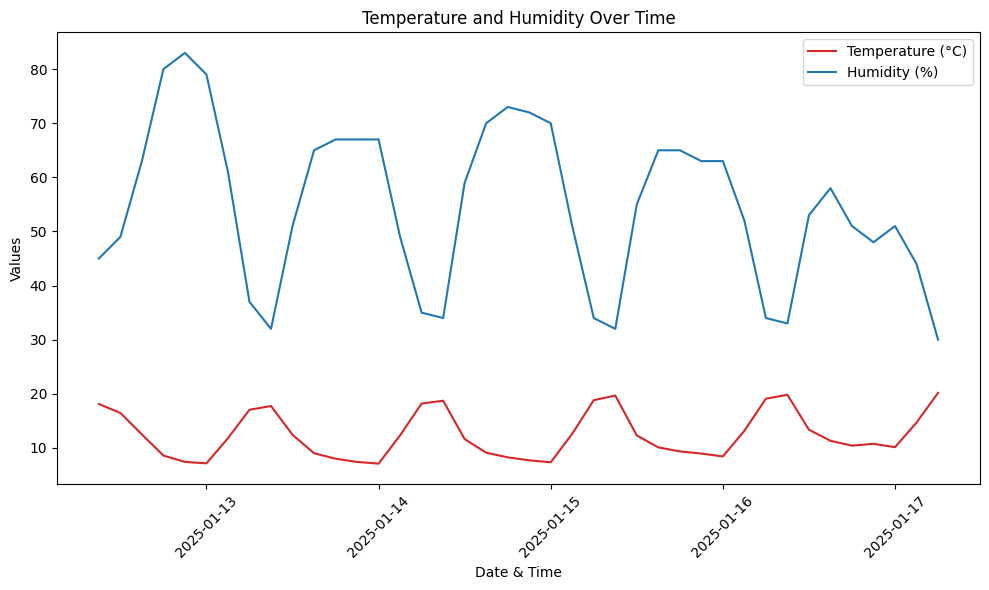

In [20]:
class WeatherPlotter:
    def __init__(self, df):
        # Initialize with the DataFrame containing weather data
        self.df = df

    def plot_temperature_humidity(self):
        # Plot temperature and humidity over time
        plt.figure(figsize=(10, 6))
        plt.plot(self.df['date_time'], self.df['temperature'], label='Temperature (°C)', color='tab:red')
        plt.plot(self.df['date_time'], self.df['humidity'], label='Humidity (%)', color='tab:blue')

        # Formatting the plot
        plt.xlabel('Date & Time')
        plt.ylabel('Values')
        plt.title('Temperature and Humidity Over Time')
        plt.xticks(rotation=45)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming df is your DataFrame with weather data
weather_plotter = WeatherPlotter(df)

# Plot temperature and humidity over time
weather_plotter.plot_temperature_humidity()


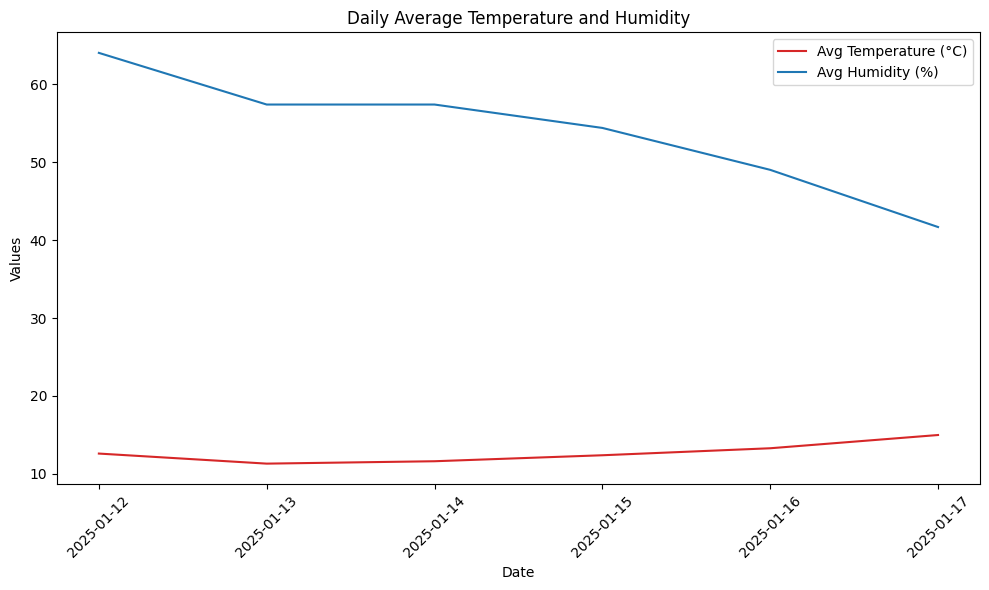

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

class WeatherDataProcessor:
    def __init__(self, df):
        # Initialize with the DataFrame containing weather data
        self.df = df

    def convert_datetime(self):
        # Convert date_time to datetime format
        self.df['date_time'] = pd.to_datetime(self.df['date_time'])

    def calculate_daily_averages(self):
        # Group data by date and calculate daily averages
        self.daily_data = self.df.groupby(self.df['date_time'].dt.date).agg({
            'temperature': 'mean',
            'humidity': 'mean',
            'wind_speed': 'mean',
            'pressure': 'mean'
        }).reset_index()

    def plot_daily_averages(self):
        # Plot the daily averages
        plt.figure(figsize=(10, 6))
        plt.plot(self.daily_data['date_time'], self.daily_data['temperature'], label='Avg Temperature (°C)', color='tab:red')
        plt.plot(self.daily_data['date_time'], self.daily_data['humidity'], label='Avg Humidity (%)', color='tab:blue')

        # Formatting the plot
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.title('Daily Average Temperature and Humidity')
        plt.xticks(rotation=45)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming df is your DataFrame with weather data
weather_processor = WeatherDataProcessor(df)

# Convert date_time to datetime format
weather_processor.convert_datetime()

# Calculate daily averages
weather_processor.calculate_daily_averages()

# Plot the daily averages
weather_processor.plot_daily_averages()


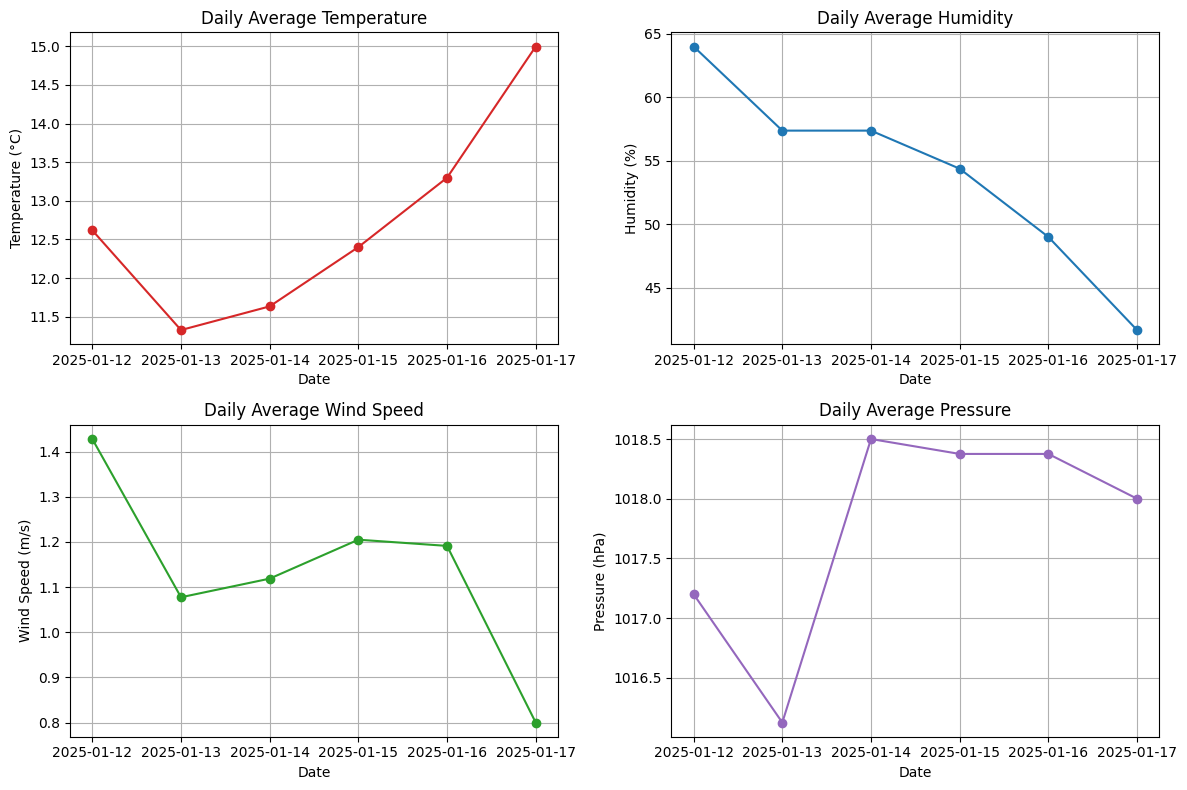

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

class WeatherDataProcessor:
    def __init__(self, df):
        # Initialize with the DataFrame containing weather data
        self.df = df

    def convert_datetime(self):
        # Convert date_time to datetime format
        self.df['date_time'] = pd.to_datetime(self.df['date_time'])

    def calculate_daily_averages(self):
        # Group data by date and calculate daily averages
        self.daily_averages = self.df.groupby(self.df['date_time'].dt.date).agg({
            'temperature': 'mean',
            'humidity': 'mean',
            'wind_speed': 'mean',
            'pressure': 'mean'
        }).reset_index()

        # Rename the columns for convenience
        self.daily_averages.columns = ['date_time', 'avg_temperature', 'avg_humidity', 'avg_wind_speed', 'avg_pressure']

    def plot_daily_averages(self):
        # Plot the daily averages
        plt.figure(figsize=(12, 8))

        # Subplot 1: Average Temperature vs Date
        plt.subplot(2, 2, 1)
        plt.plot(self.daily_averages['date_time'], self.daily_averages['avg_temperature'], marker='o', color='tab:red')
        plt.title('Daily Average Temperature')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C)')
        plt.grid(True)

        # Subplot 2: Average Humidity vs Date
        plt.subplot(2, 2, 2)
        plt.plot(self.daily_averages['date_time'], self.daily_averages['avg_humidity'], marker='o', color='tab:blue')
        plt.title('Daily Average Humidity')
        plt.xlabel('Date')
        plt.ylabel('Humidity (%)')
        plt.grid(True)

        # Subplot 3: Average Wind Speed vs Date
        plt.subplot(2, 2, 3)
        plt.plot(self.daily_averages['date_time'], self.daily_averages['avg_wind_speed'], marker='o', color='tab:green')
        plt.title('Daily Average Wind Speed')
        plt.xlabel('Date')
        plt.ylabel('Wind Speed (m/s)')
        plt.grid(True)

        # Subplot 4: Average Pressure vs Date
        plt.subplot(2, 2, 4)
        plt.plot(self.daily_averages['date_time'], self.daily_averages['avg_pressure'], marker='o', color='tab:purple')
        plt.title('Daily Average Pressure')
        plt.xlabel('Date')
        plt.ylabel('Pressure (hPa)')
        plt.grid(True)

        # Adjust layout to prevent overlap
        plt.tight_layout()

        # Show the plot
        plt.show()

# Example usage:
# Assuming df is your DataFrame with weather data
weather_processor = WeatherDataProcessor(df)

# Convert date_time to datetime format
weather_processor.convert_datetime()

# Calculate daily averages
weather_processor.calculate_daily_averages()

# Plot the daily averages
weather_processor.plot_daily_averages()


In [26]:
from IPython.display import FileLink

# Create a download link
FileLink(r'daily_averages_weather_data.csv')


/content/daily_averages_weather_data.csv